In [ ]:
import numpy as np
import matplotlib.pyplot as plt



```
A = 2x0, B = 2y0, C = r0² − x0² − y0²

(x0, y0, 1)     (A,
(xi, yi, 1)   *  B,  = (xi² + yi²)
(xn, yn, 1)      C)
```
**Ejercicio 1.** Escribir un programa que implemente esta idea. Debe recibir una matriz de N
pares (xi, yi) y devolver los parámetros de la circunferencia.



In [ ]:
def cuadradosMinimos (A,b):
  At=np.transpose(A)
  AtA=np.dot(At,A)
  Atb=np.dot(At,b)
  x=np.linalg.solve(AtA,Atb)
  return x

def aproximaCircunferencia (puntos):
  Matriz=np.zeros((len(puntos),3))
  b=np.zeros(len(puntos))
  for i in range(0,len(puntos)):
    Matriz[i,0]=puntos[i,0] #xi
    Matriz[i,1]=puntos[i,1] #yi
    Matriz[i,2]=1
    b[i]=puntos[i,0]**2+puntos[i,1]**2  #xi²+yi²
  X=cuadradosMinimos(Matriz,b)
  x0=X[0]/2
  y0=X[1]/2
  r=np.sqrt(X[2]+x0**2+y0**2)
  print("centro =",(x0,y0),"radio =",r)
  angulo = np.linspace(0, 2*np.pi, 200)
  x = r * np.cos(angulo) + x0
  y = r * np.sin(angulo) + y0
  plt.plot(x,y,"m",label="Ajuste")
  plt.title('Aproximacion de la circunferencia')
  plt.axis('equal')
  return (x0,y0,r)

 **Ejercicio 2)**Para probar el programa podemos simular su aplicación sobre datos generados
artificialmente. Generar conjuntos de datos según las siguientes pautas y graficarlos junto con
el círculo obtenido a partir de ellos:

centro = (1.9887250964266097, -7.834463009601963) radio = 1.8326539440013159


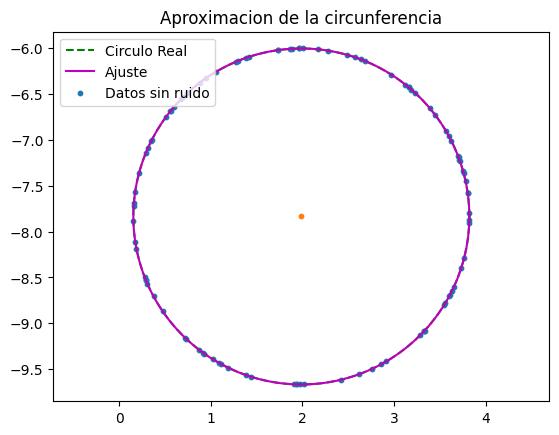

In [ ]:
#Ejercicio 2)a) Datos sobre un círculo completo, sin ruido:

def GeneradatosCirculoSinRuido():
  x0=np.random.uniform(-10,10)
  y0=np.random.uniform(-10,10)
  r=np.random.uniform(1,10)
  angulo=np.random.uniform(0,2*np.pi,100)
  x = r * np.cos(angulo) + x0
  y = r * np.sin(angulo) + y0

  angulo=np.linspace(0,2*np.pi,100) #Tenido en cuenta para poder graficar el circulo real y ver cuan cerca se encuentra la aproximación.
  X = r * np.cos(angulo) + x0
  Y = r * np.sin(angulo) + y0
  plt.plot(X,Y,"g--",label="Circulo Real")

  return(np.column_stack((x,y)))



datosCirculoSinRuido=GeneradatosCirculoSinRuido()
(x0,y0,r)=aproximaCircunferencia(datosCirculoSinRuido)
plt.scatter(datosCirculoSinRuido[:,0],datosCirculoSinRuido[:,1],s=10,label="Datos sin ruido")

plt.scatter(x0,y0,s=10)
plt.legend(loc="upper left")

centro = (-2.8097618018678125, -2.7950475450897163) radio = 8.128535822078803


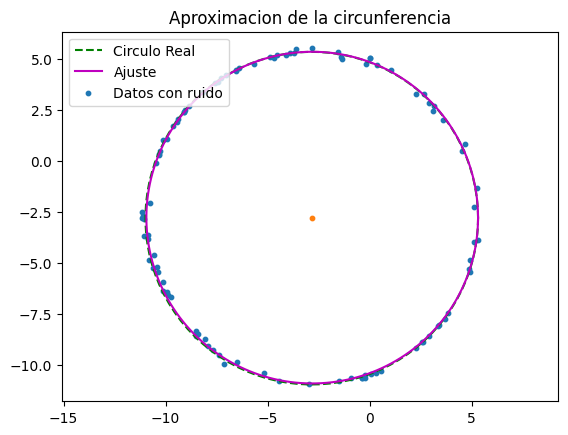

In [ ]:
#Ejercicio 2)b) Datos sobre un círculo completo, con ruido aleatorio:

def GeneradatosCirculoConRuido():
  x0=np.random.uniform(-10,10)
  y0=np.random.uniform(-10,10)
  r=np.random.uniform(1,10)
  angulo=np.random.uniform(0,2*np.pi,100)

  perturbacion = np.random.uniform(-0.2,0.2,len(angulo)) #Ruido aleatorio entre -0.2 y 0.2, se eligen esos valores, como se pudo haber elegido otro

  x = r * np.cos(angulo) + x0 + perturbacion
  y = r * np.sin(angulo) + y0 + perturbacion

  angulo=np.linspace(0,2*np.pi,100)  #Tenido en cuenta para poder graficar el circulo real y ver cuan cerca se encuentra la aproximación.
  X = r * np.cos(angulo) + x0
  Y = r * np.sin(angulo) + y0
  plt.plot(X,Y,"g--",label="Circulo Real")

  return (np.column_stack((x,y)))

datosCirculoConRuido=GeneradatosCirculoConRuido()

(x0,y0,r)=aproximaCircunferencia(datosCirculoConRuido)
plt.scatter(datosCirculoConRuido[:,0],datosCirculoConRuido[:,1],s=10,label="Datos con ruido")
plt.legend(loc="upper left")

plt.scatter(x0,y0,s=10)

centro = (-1.5077770348767257, -2.7433046468256945) radio = 0.36496798222788174


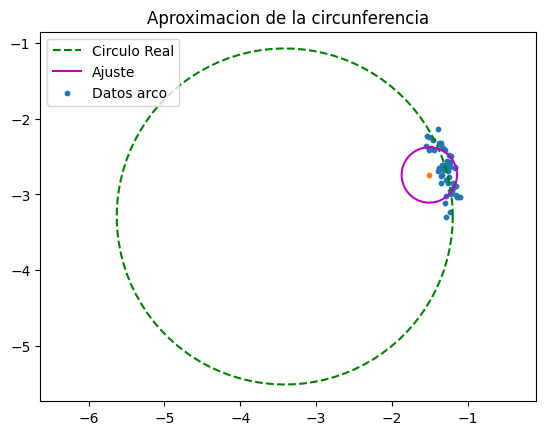

In [ ]:
#Ejercicio 2)c) Datos sobre un arco de circunferencia, con ruido aleatorio:

def GeneradatosArco():
  arco=np.random.uniform(0,2*np.pi)

  x0=np.random.uniform(-10,10)
  y0=np.random.uniform(-10,10)
  r=np.random.uniform(1,10)
  angulo=np.random.uniform(0,arco,50)

  perturbacion = np.random.uniform(-0.1,0.1,len(angulo)) #Ruido aleatorio entre -0.1 y 0.1

  x = r * np.cos(angulo) + x0 + perturbacion
  y = r * np.sin(angulo) + y0 + perturbacion

  angulo=np.linspace(0,2*np.pi,100) #Tenido en cuenta para poder graficar el circulo real y ver cuan cerca se encuentra la aproximación.
  X = r * np.cos(angulo) + x0
  Y = r * np.sin(angulo) + y0
  plt.plot(X,Y,"g--",label="Circulo Real")

  return(np.column_stack((x,y)))

datosArco=GeneradatosArco()
(x0,y0,r)=aproximaCircunferencia(datosArco)
plt.scatter(datosArco[:,0],datosArco[:,1],s=10,label="Datos arco")
plt.legend(loc="upper left")

plt.scatter(x0,y0,s=10)

Notamos que cuando los datos se generan sobre un arco muy pequeño, el metodo no encuentra el círculo correcto. El círculo que soluciona cuadrados mínimos para estos casos es uno pequeño que encierra la mayoría de los datos. Ésto es porque, probablemente, el programa note una distribución de los datos uniforme dentro de una porción pequeña (por eso solo sucede cuando el arco es muy chico), y al "notar" eso, busca la mejor circunferencia que aproxime a esos puntos, en esa porción, como si los puntos representaran una circunferencia completa, ya que el programa no sabría distinguir si se trata de un círculo completo o no.


 **Ejercicio 3)** Implementar un programa que reciba como input una función f y un punto z y calcule el vector gradiente de f evaluado en z, y un programa que calcule el Hessiano de f evaluado en z. Ambos utilizando diferencias forward.

In [ ]:
def Grad(f,z):
  h=10**(-5)
  gradiante = np.zeros(len(z))
  for i in range(len(z)):
    z0masdzi = z.copy()
    z0masdzi[i] += h #Incremento en la coordenada i para la derivada parcial

    gradiante[i] = (f(z0masdzi)-f(z))/h
  return gradiante

def Hess(f,z):
  h=10**(-5)
  n=len(z)
  hessiano = np.zeros((n,n))
  for i in range(n):
    z0masdzi = z.copy()
    z0masdzi[i]+=h #Incremento en la coordenada i para la derivada parcial
    for j in range(n):
      z0masdzj = z.copy()
      z0masdzj[j]+=h #Incremento en la coordenada j

      z0masdzij=z0masdzi.copy()
      z0masdzij[j]+=h #Incremento en la coordenadas i y j

      hessiano[i,j]=(f(z0masdzij)+f(z)-f(z0masdzi)-f(z0masdzj))/(h**2)


        #Uxy= (U(x+h,y+h)-U(x,y+h)-U(x+h,y)+U(x,y))/h^2 derivada forward aplicada en x sobre la aplicada en y
        #Si i=j el la derivada segunda va a dar
        #Uxx= (U(x+2h)-2U(x+h)+U(x))/h^2
  return hessiano


 **Ejercicio 4)**  Implementar un programa que aplique el método de Newton, utilizando los
programas del ejercicio anterior para computar el gradiente y el Hessiano y el método de Cholesky para resolver el sistema

In [ ]:
def Cholesky(A): #Descompobe una matriz usando el método de Cholesky, dada una matriz devuelve L
 n=len(A)
 L=np.zeros((n,n))
 Linv=np.zeros((n,n))
 L[0,0]=np.sqrt(A[0,0])
 for i in range(1,n):
   L[i,0]=A[i,0]/L[0,0]
 for j in range(1,n):
   suma=0
   for k in range(0,j):
    suma= suma + L[j,k] * L[j,k]
    L[j,j]=np.sqrt(A[j,j]-suma)
    for i in range(j+1,n):
     sum=0
     sum+=L[i,k] * L[j,k]
     L[i,j]=(A[i,j]-sum)/L[j,j]
 return(L)

def v0delosDatos(puntos): #Dato inical para comenzar la iteración de Newton
  v1o=np.mean(puntos[:,0]) #Media de los xi
  v2o=np.mean(puntos[:,1]) #Media de los yi; (v1[0] , v2[0]) es el punto promedio de los datos
  distancias=np.sqrt((v1o-puntos[:,0])**2+(v2o-puntos[:,1])**2) #Distancias entre cada punto y el punto medio
  v3o=np.mean(distancias) #v3[0] es el radio promedio calculado a partir de las distancias
  return np.array([v1o,v2o,v3o])

def aproximaCircunferenciaNewton(puntos):
  def εg(v): #Error calculado como la suma del cuadrado de las distancias de cada punto a la circunferencia
    suma = 0
    for punto in puntos:
      distancia = np.sqrt((punto[0] - v[0])**2 + (punto[1] - v[1])**2) - v[2]
      suma += distancia**2
    return suma

  #Iteracion de Newton:
  #v[k+1] = v [k] − (Hess(εg,v[k]))^-1 * Grad(εg,v[k])

  #u= (Hess(εg,v[k]))^-1 * Grad(εg,v[k])
  #(Hess(εg,v[k])) * u= Grad(εg,v[k])

  #L  =  Cholesky (Hess(εg,v[k]))
  #L * Lᵗ = (Hess(εg,v[k])
  #L * Lᵗ * u= Grad(εg,v[k])
  #Lᵗ * u= (L^-1 * Grad(εg,v[k])) ->resolver como sistema
  #u= Lᵗ ^-1 *(L^-1 * Grad(εg,v[k])) ->resolver multiplicando matrices

  #v[k+1] = v [k] − u

  v=v0delosDatos(puntos)
  v_ant=np.zeros(3)
  i=0
  while (i<100) and np.linalg.norm(εg(v)-εg(v_ant))>10**(-6):
    i += 1
    L = Cholesky(Hess(εg,v))
    Linv = np.linalg.inv(L)
    Lt = np.transpose(L)
    u = np.linalg.solve(Lt, np.dot(Linv, Grad(εg,v)))
    v_ant = v
    v = v-u

  (x0,y0,r)=v

  print("centro=",(x0,y0),"radio=",r)
  angulo = np.linspace(0, 2*np.pi, 200)
  x = r * np.cos(angulo) + x0
  y = r * np.sin(angulo) + y0
  plt.plot(x,y,'r',label="Ajuste Newton")
  plt.title('Aproximacion de la circunferencia por Newton')
  plt.legend(loc="upper left")
  plt.axis('equal')
  return (x0,y0,r)

Termino por tolerancia
centro= (-5.034736483433924, 8.183729016757127) radio= 3.2607722318225174


(-8.63354038904996, -1.447317768876237, 4.497514155647665, 11.780511670002396)

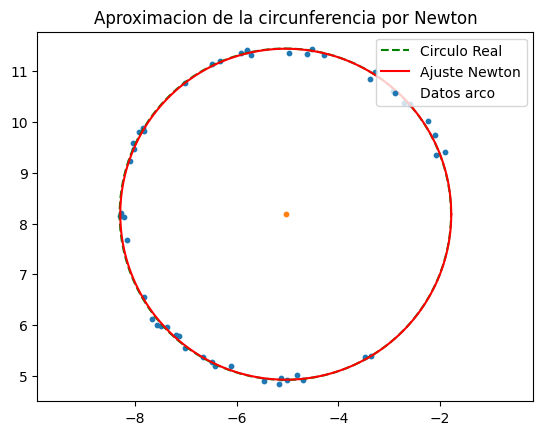

In [ ]:
#Prueba comparando con método de cuadrados mínimos, usando datos aleatorios de un arco de cincunferencia, con ruido aleatorio:
datosArco=GeneradatosArco()

(x0,y0,r)=aproximaCircunferenciaNewton(datosArco)
plt.scatter(datosArco[:,0],datosArco[:,1],s=10,label="Datos arco")
plt.legend(loc="upper right")
plt.scatter(x0,y0,s=10)
plt.axis('equal')

Notamos que cuando los datos se generan sobre un arco menor a π/4, la descomposición por Cholesky falla, esto es debido a que la matriz Hessiana que se genera en estos casos no es definida positiva. Notar que ésto sucede en los casos similares a la resolución por cuadrados mínimos.

centro= (4.82359706581942, 0.6067636754689265) radio= 4.7173646623563865


(-0.36488741909393635,
 10.012681005050563,
 -4.582175796506407,
 5.795703147444259)

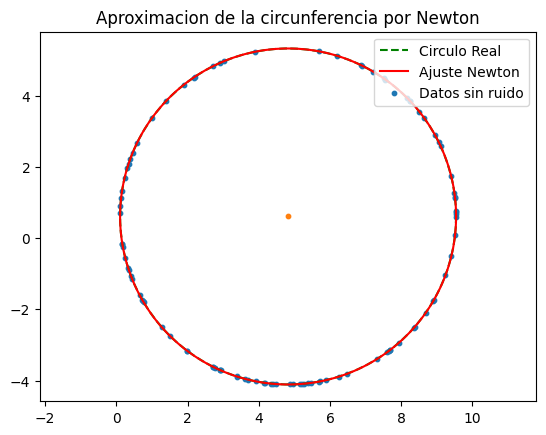

In [ ]:
datosCirculoSinRuido=GeneradatosCirculoSinRuido()
(x0,y0,r)=aproximaCircunferenciaNewton(datosCirculoSinRuido)
plt.scatter(datosCirculoSinRuido[:,0],datosCirculoSinRuido[:,1],s=10,label="Datos sin ruido")
plt.legend(loc="upper right")

plt.scatter(x0,y0,s=10)
plt.axis('equal')


centro= (5.068245750525841, 6.925064546452574) radio= 9.43065611352202


(-5.416266641277413, 15.49133461494769, -3.640649098484852, 17.398355065869172)

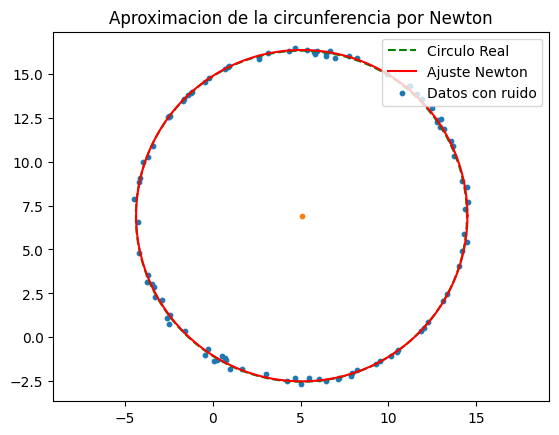

In [ ]:
datosCirculoConRuido=GeneradatosCirculoConRuido()

(x0,y0,r)=aproximaCircunferenciaNewton(datosCirculoConRuido)
plt.scatter(datosCirculoConRuido[:,0],datosCirculoConRuido[:,1],s=10,label="Datos con ruido")
plt.legend(loc="upper right")

plt.scatter(x0,y0,s=10)
plt.axis('equal')